### Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

### Loading the dataset

In [7]:
# Creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary
df = pd.read_sql_query("SELECT * FROM vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


### Exploratory Data Ananlysis

In the earlier steps, we explored the individual tables within the database to:

- Understand key variables and their distributions
- Identify important realationships between tables
- Decide which columns are essential for analysis

Now, in this phase of EDA, we focus on the **final summary table** ('vendor_salessummary') that combines purchase, sales and freight data as the vendor-brand level.

### Objectives

- Analysis the **distribution of each numerical and categorical column**
- Detect **outliers or anomalies** in the data
- Assess **data quality** (e.g., missing values, inconsistent entries)
- Prepare the data for **further visual analysis and modeling**

This step ensures we have clean, reliable insights and performance evaluation.

In [9]:
# summary statstics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


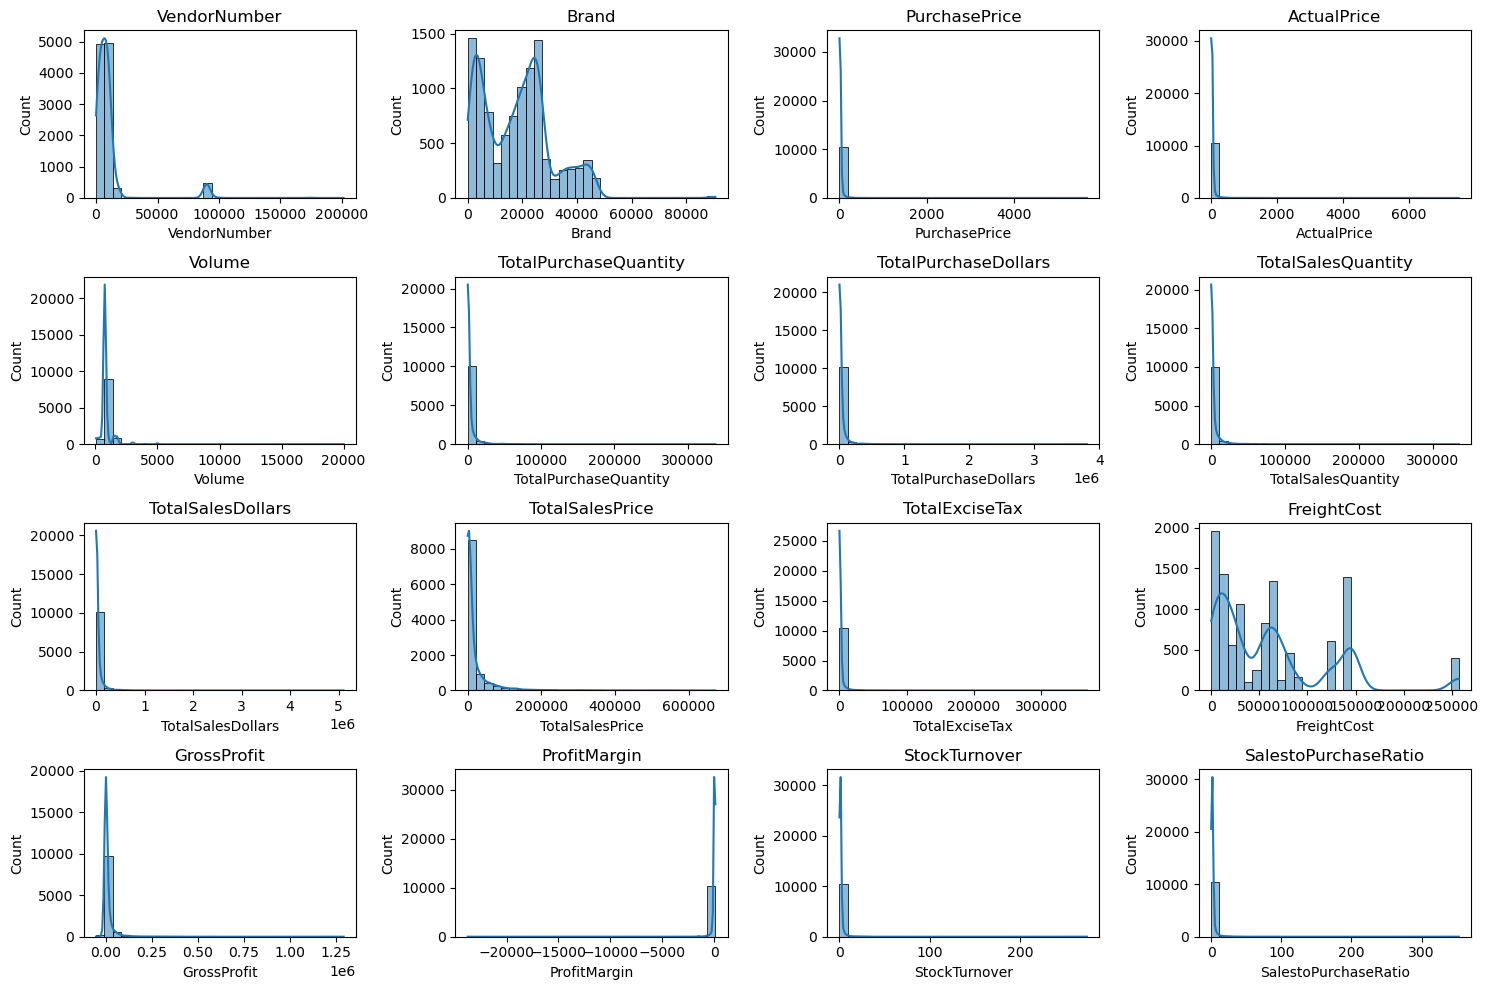

In [13]:
# Distribution Plots for nummerical Columns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

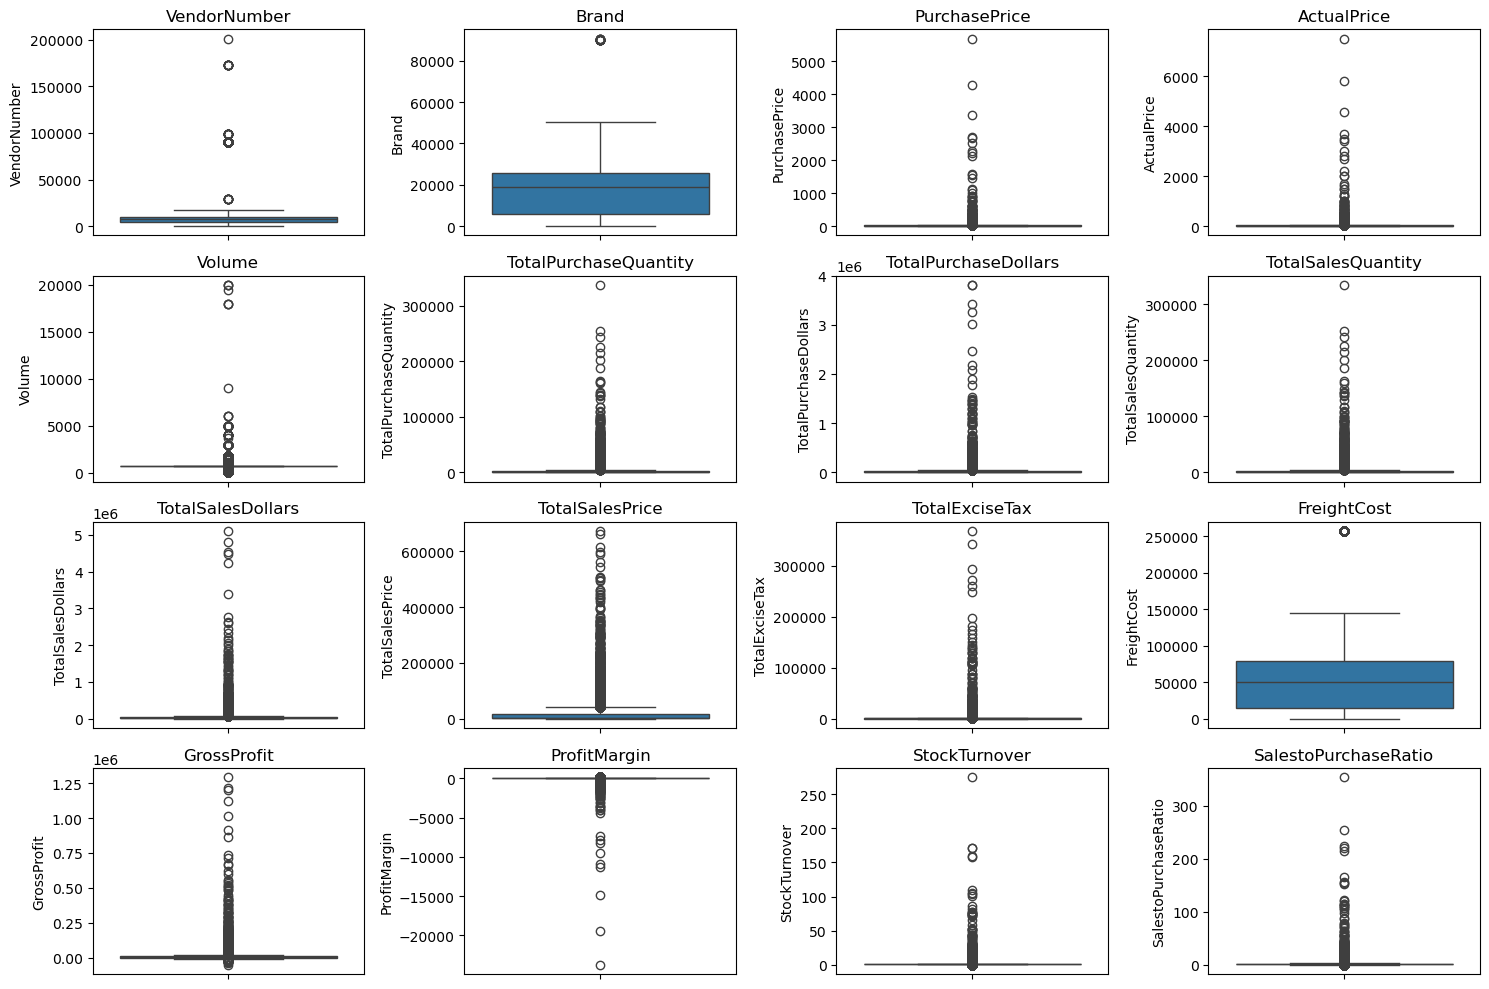

In [16]:
# Outlier Detection with Boxplots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### Summary Statistics - Key Insights

After generating summary statistics from the ' vendor_sales_summary' table, several patterns and anomalies emerged:

### Negative and Zero values

- **Gross Profit**: The minimum value is **-52,002.78**, indicating that some transactions are incurring **losses**. This could be due to:
   - High purchase costs
   - Discounted selling prices
   - Expired/obsolete inventory sold at loss

- **Profit Margin**: Contains negative and zero values, suggesting **zero revenue** in some cases or **revenue lower than costs**.

- **Total Sales Quantity and Total sales Dollars**: Minimun value are **0**, implying some products were **purchased but never sold**- potentially slow-moving or obsolete stock.

---

### Outliers and high Variance (Strandard Deviation)

- **Purchase Price and Actual Price**:
  - Max values: '5,681.81' and '7,499.99'
  - Mean: '24.39 and 35.64'
  - Indicates **extreme price variation**, possibly due to **premium or specialty products**.
    
- **Freight Costs**:
  - Range from '0.09' to '257,032.07'
  - Suggests **logistics inefficiencies** or large bulk shipments with high transportation costs.

- **Stock Turnover**:
  - Varies from '0' to **274.5**
  - A value > 1 implies the **sold quantity exceeds the current purchase quantity** - possible due to :
    - Older inventory stock being sold
    - Misaliganment between purchase and sales timelines

---

### Conclusion

These insights are crucial for identifying:

- Loss-generating products or vendor
- Pricing inconsistencies
- Inventory management issues
- Sales performance extremes

Further analysis and filtering can help in creating a robust vendor/product-level strategy.
  

In [18]:
# Let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT *
FROM vendor_sales_summary
WHERE GrossProfit > 0
AND ProfitMargin > 0
AND TotalSalesQuantity > 0""", conn)

In [19]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


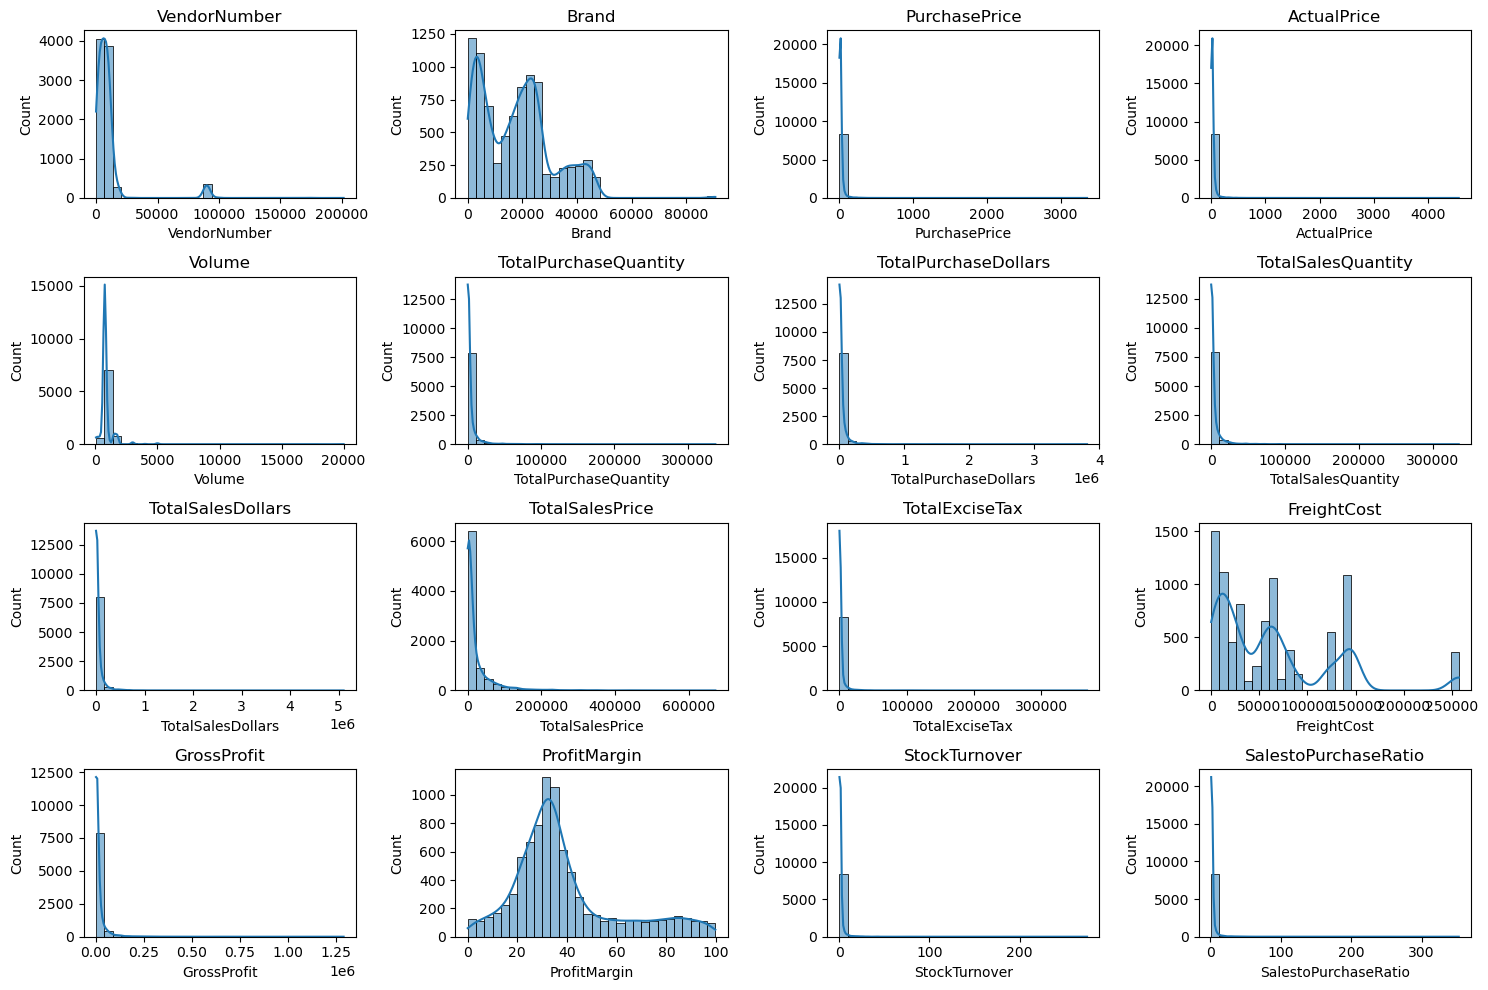

In [20]:
# Distribution Plots for nummerical Columns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) #Adjust grid layout as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

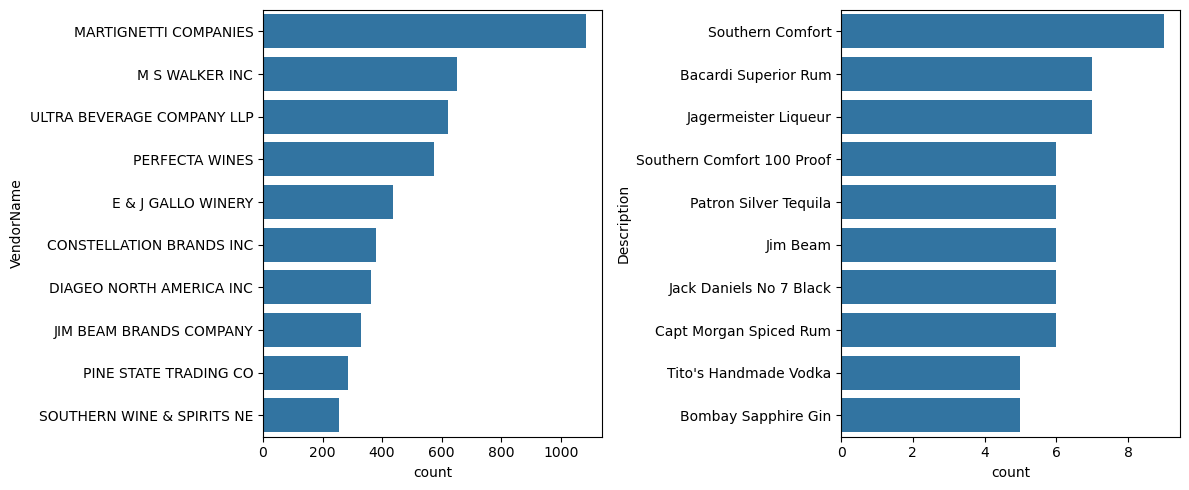

In [24]:
# count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize=(12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1,2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10]) # Top 10 categories
plt.tight_layout()
plt.show()

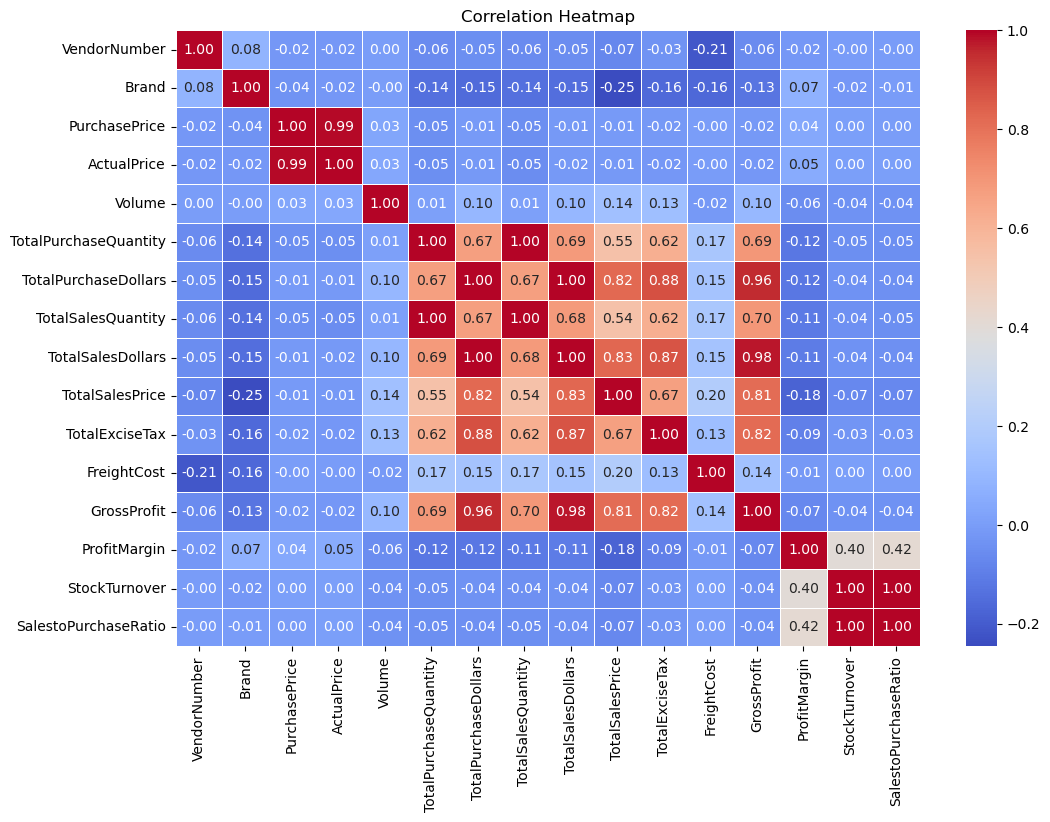

In [28]:
# Correltion Heatmap
plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

### Corelation Analysis - Key Insights

A correlation matrix was used to explore realtionsips between key numerical variables in the 'vendor_sales_summary' table. Here are the highlights:

---

### Weak Correlations with Price

- **Purchase Price vs Total Sales Dollars**: Correlation = **-0.012**
- **Purchase Price vs Gross**: Correlation = **-0.016**

These very weak negative correlations suggest that **variations in purchase price have little to no impact on overall revenue or profitability**, possibly due to offsetting factors like:
- Discounts
- Variable markup
- Pricing strategies per brand

---

### Strong Positive Correlation

**Total Purchase Quantity vs Total Sales Quantity**: COrrelation = **0.999**

This extremely strong correlation indicates **high inventory efficiency** - most of the stock purchase being sold, minimizing inventory waste.

---

### Negative Correlation with Margin

-**Profit Margin vs Total Sales Price**: Correlation = **0.179**

This suggests that **higher sales prices may lead to lower profit margins**, potentially due to:

  - competitive pricing strategies
  - Increased marketing/Selling costs
  - Premium products with lower margins

---

### Stock Trunover Insights

- **Stock Trunover vs Gross Profits**: Correlation = **-0.38**
- **Stock Turnover vs Profit Margin**: Correlation = **-0.055**

These weak negative correations imply that **faster inventory movement does not necessarily lead to better profitablility**, highlighting the need to balance speed with margin control.

---

### Conclusion

While some variables like quamtity sold and purchase show strong correlation, **pricing and turnover** mertics reveal **complex business dynamics** that require deeper analysis beyond just correlation.

## Data Analysis

#### Identify brands that needs Promotional or Pricing Adjustments which exhibit loer performance but higher profit margins.

In [31]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()
brand_performance

,Description,TotalSalesDollars,ProfitMargin
0,(RI) 1,21519.09,18.060661
1,.nparalleled Svgn Blanc,1094.63,29.978166
2,10 Span Cab Svgn CC,2703.89,20.937612
3,10 Span Chard CC,3325.56,27.806445
4,10 Span Pnt Gris Monterey Cy,2082.22,32.226182
...,...,...,...
7702,Zorvino Vyds Sangiovese,10579.03,29.525675
7703,Zuccardi Q Malbec,1639.18,23.981503
7704,Zum Rsl,10857.34,32.675038
7705,Zwack Liqueur,227.88,16.653502


In [32]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [33]:
low_sales_threshold

560.299

In [34]:
high_margin_threshold

64.97017552750113

In [41]:
# Filter brands with low sales but high profit margins
target_brands = brand_performance[
     (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
     (brand_performance['ProfitMargin'] >= high_margin_threshold)
      ]
print("Brand with low Sales but High Margin Profit:")
display(target_brands.sort_values('TotalSalesDollars'))

Brand with low Sales but High Margin Profit:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [44]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualization

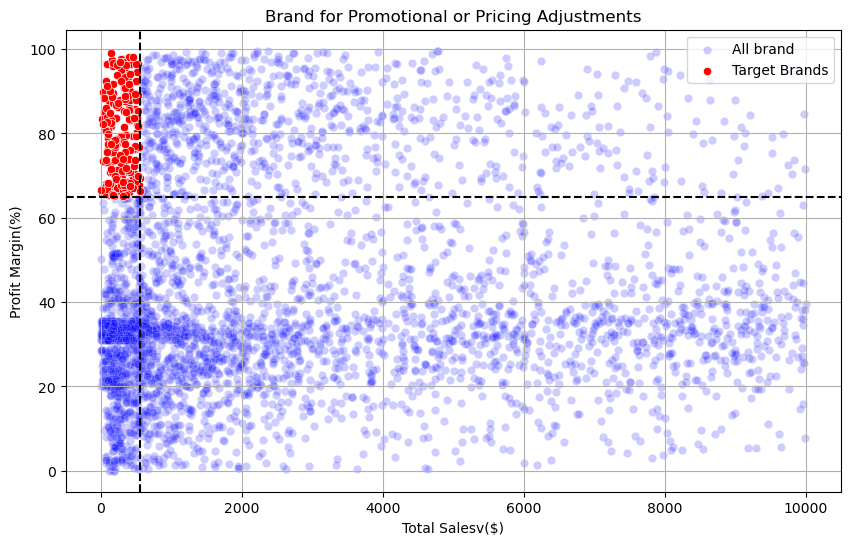

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x='TotalSalesDollars', y='ProfitMargin', color='blue', label='All brand', alpha = 0.2)
sns.scatterplot(data=target_brands, x='TotalSalesDollars', y='ProfitMargin', color='red', label='Target Brands')

plt.axhline(high_margin_threshold, linestyle='--', color='black', label='High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color='black', label='low Sales Margin')

plt.xlabel("Total Salesv($)")
plt.ylabel("Profit Margin(%)")
plt.title("Brand for Promotional or Pricing Adjustments")
plt.grid(True)
plt.show()

### Which vendors and brands demonstrate the highest sales performance

In [51]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.2f}M"
    else:
        return str(value)

In [48]:
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [49]:
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [50]:
top_brands

Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [53]:
top_brands.apply(lambda x : format_dollars(x))

Description
Jack Daniels No 7 Black    7.96M
Tito's Handmade Vodka      7.40M
Grey Goose Vodka           7.21M
Capt Morgan Spiced Rum     6.36M
Absolut 80 Proof           6.24M
Jameson Irish Whiskey      5.72M
Ketel One Vodka            5.07M
Baileys Irish Cream        4.15M
Kahlua                     3.60M
Tanqueray                  3.46M
Name: TotalSalesDollars, dtype: object

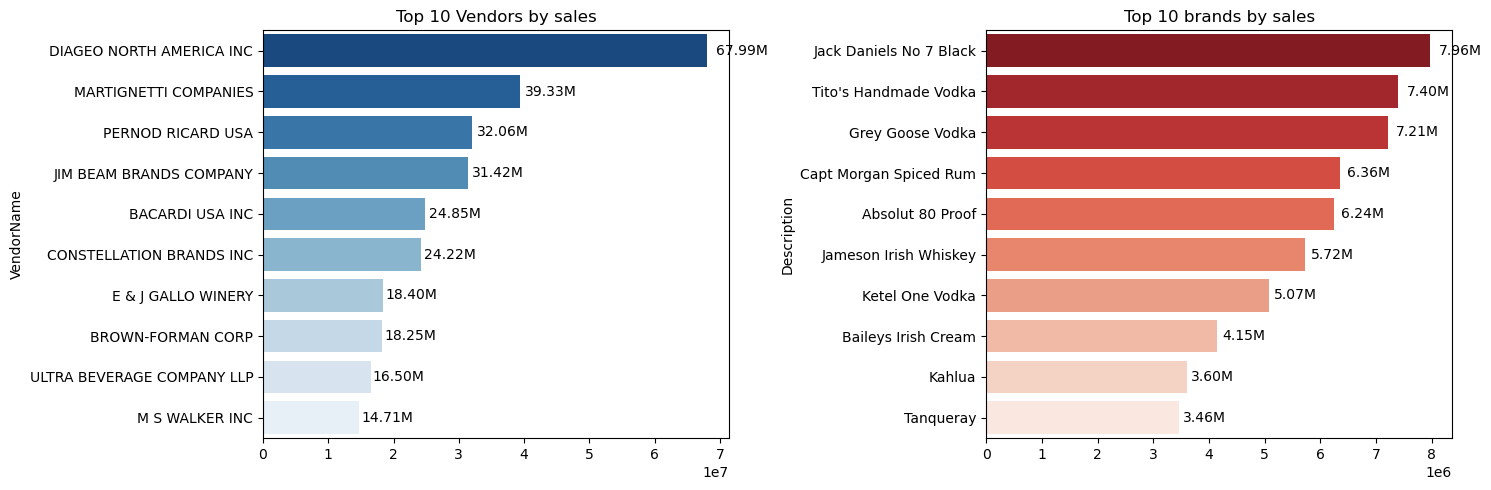

In [59]:
plt.figure(figsize=(15,5))

#plot fot Top vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette='Blues_r')
plt.title("Top 10 Vendors by sales")

for bar in ax1.patches:
    ax1.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha='left',va='center', fontsize=10, color='black')

# Plot for top brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x = top_brands.values, palette='Reds_r')
plt.title("Top 10 brands by sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width() * 0.02),
             bar.get_y() + bar.get_height() / 2,
             format_dollars(bar.get_width()),
             ha = 'left', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### Which vendors contibute the most to total purchase dollars?

In [62]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [78]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [79]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False),2)
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [80]:
# Display Top 10 vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [71]:
top_vendors['PurchaseContribution%'].sum()

0.6600000000000001

In [82]:
top_vendors['CumulativeContribution'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


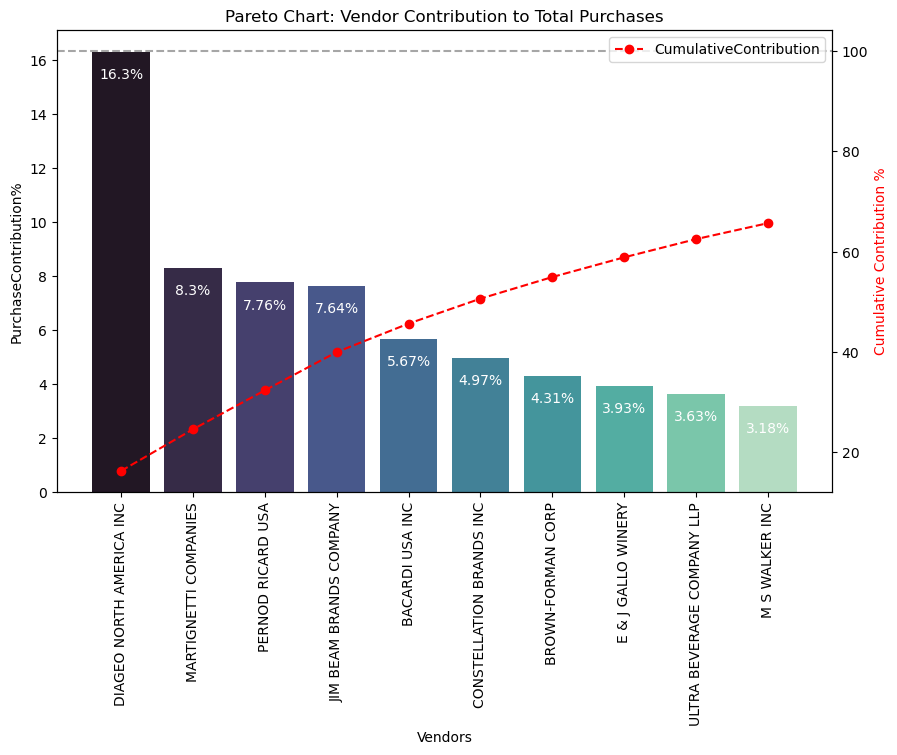

In [85]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for purchase contribution
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['PurchaseContribution%'], palette='mako', ax=ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i, value - 1, str(value)+'%', ha = 'center', fontsize=10, color='white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution'], color='red', marker='o', linestyle='dashed', label='CumulativeContribution')

ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax2.set_ylabel('Purchase Contribution %', color = 'blue')
ax2.set_ylabel('Cumulative Contribution %', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### How much of total procurement is dependent on the top vendors?

In [87]:
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)}%")

Total Purchase Contribution of top 10 vendors is 65.69%


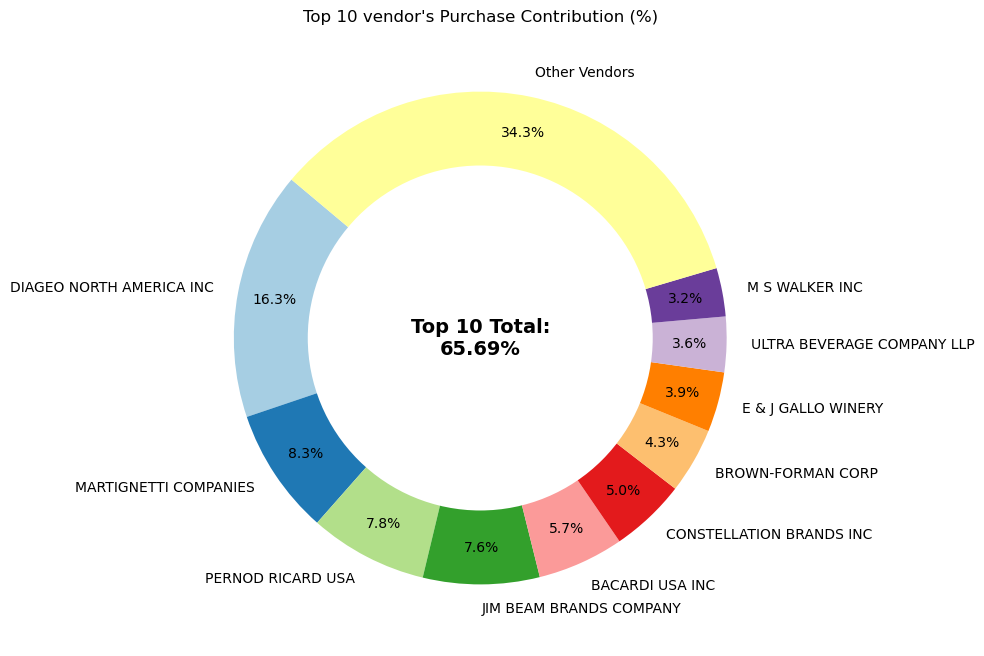

In [97]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut chart
fig, ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels = vendors, autopct = '%1.1f%%',
                                  startangle=140, pctdistance=0.85, colors=plt.cm.Paired.colors)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add total contribution annotation in the centre
plt.text(0,0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize=14, fontweight='bold', ha='center', va='center')

plt.title("Top 10 vendor's Purchase Contribution (%)")
plt.show()

### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volumne for cost saving?

In [98]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']

In [100]:
df['Ordersize'] = pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=['Small', 'Medium', 'Larger'])

In [102]:
df.groupby('Ordersize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
Ordersize,
Small,39.068186
Medium,15.486414
Larger,10.777625


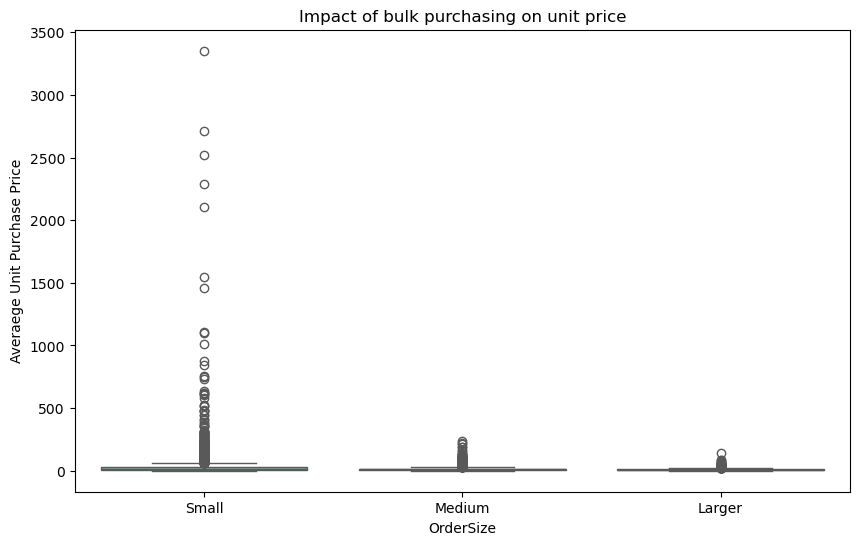

In [105]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Ordersize', y='UnitPurchasePrice', palette="Set2")
plt.title("Impact of bulk purchasing on unit price")
plt.xlabel("OrderSize")
plt.ylabel("Averaege Unit Purchase Price")
plt.show()

### Which vendors have low inventory turnover, indicaiting excess stock and slow-moving products?

In [108]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


### How much capital is locked in unsold inventory per vendor and which vendors contribute the most to it?

In [110]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


In [116]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the hghest locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='UnsoldInventoryValue', ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21M
46,JIM BEAM BRANDS COMPANY,554.67M
68,PERNOD RICARD USA,470.63M
116,WILLIAM GRANT & SONS INC,401.96M
30,E & J GALLO WINERY,228.28M
79,SAZERAC CO INC,198.44M
11,BROWN-FORMAN CORP,177.73M
20,CONSTELLATION BRANDS INC,133.62M
61,MOET HENNESSY USA INC,126.48M
77,REMY COINTREAU USA INC,118.60M


### What is the 95% confidendce intervals for profit margins of top-performing and low-performing vendors.

In [117]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [121]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [122]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [123]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [128]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data)) #Standing error 
    t_critcal = stats.t.ppf((1 + confidence) / 2, df= len(data) -1)
    margin_of_error = t_critical = std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.96, 31.40), Mean: 31.18
Low Vendors 95% CI: (41.02, 42.11), Mean: 41.57


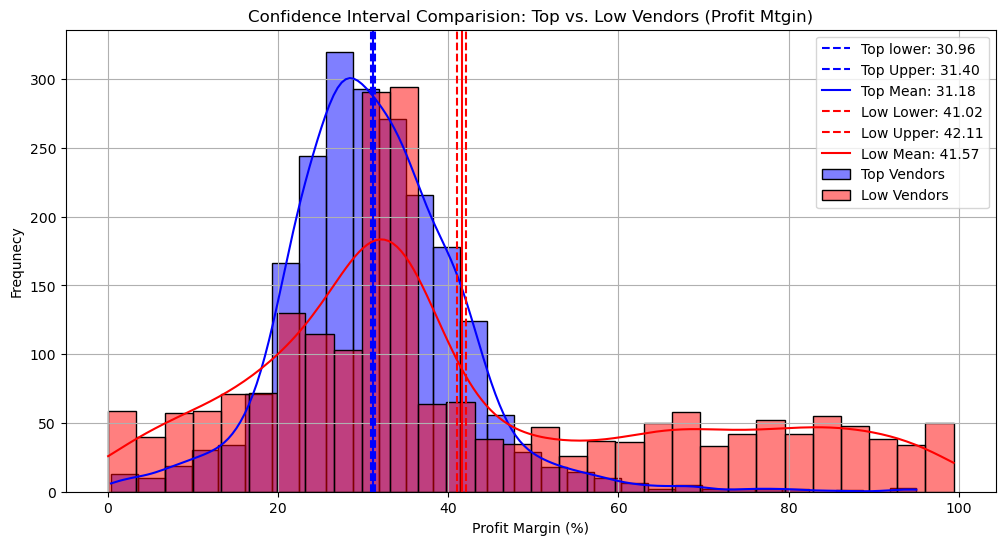

In [132]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendor Plot
sns.histplot(top_vendors, kde=True, color='blue', bins=30, alpha=0.5, label = "Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Top Vendor Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparision: Top vs. Low Vendors (Profit Mtgin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequnecy")
plt.legend()
plt.grid(True)
plt.show()

### Confidence Interval Insights - Vednor Profittablility

An analysis of **profit margin confidence intervals** reveals an important pattern betweem high- and low-performing vendors:

---

### Low-Performnce Vendors

- **Confidence Intervals**: **40.48% to 42.62%**
- These vendors tend to have **higher profit margins**, which may result from:
  - Premium pricing strategies
  - Lower operational or distribution costs
  - Niche or high-value products

However, their **overall sales volume**, suggesting that profitability is concentrated but not not scalable.

---
### High-Performing Vendors

- **Confidence Interval**: **30.74% to 31.61%**
- Despite having **high sales volumes**, their margins are **lower**, their margins are **lower**, possibly due to:
  - Competitive pricing pressuures
  - Increased overheads or logistics costs
  - Discount-driven strategies to boost volume

---

### Strategic Implications

- **For High-Performing Vendors**:
  - Consider **selective price optimization**
  - Explore **bundling or cross-selling** to increase margins
  - Invest in **cost-efficiency initiatives** to boost profitablility

- **For Low-Performing Vendors**:
  - Focus on increasing **market reach and brand visibility**
  - Reevaluate **pricing vs. volume trade-offs**
  - Imporve **distribution and promotional strategies** to scale up without sacrificing margins
    
---

### Conclusion

Understanding margin variablity across performance tiers helps inform trageted strategies for both gorwth and profitablity. Hight sales don't always mean high profits - and high margins alone don't guarantee success. 

### Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H<sub>0</sub> (Null Hypothesis): There is no significant difference in the mean profit margins of top-performing and low performing vendors.

H<sub>1</sub> (Alternative Hypothesis): The mean profit marigins of top-performing and low-performing vendors are significantly different.

In [138]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Perform two-sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

# Print Results
print(f"T-Statistic: {t_stat:.4f}, P-value: {p_value}:.4f")
if p_value < 0.05:
    print("Reject Ho : There is significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject Ho : No significant difference in profit margin.")

T-Statistic: -17.6695, P-value: 2.2968978144316588e-66:.4f
Reject Ho : There is significant difference in profit margins between top and low-performing vendors.


In [139]:
# Export to csv
df.to_csv("vendor_sales_summary.csv", index = False)

#Close the connection
conn.close()